In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("zoo.csv")
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
class_type       7
dtype: int64

In [4]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [5]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.drop(["animal_name","class_type"],axis=1,inplace=True)

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans()

In [10]:
sse = []
for i in range(1,15):
    km = KMeans(n_clusters=i,n_init=500)
    km.fit(df)
    sse.append(km.inertia_)

In [11]:
sse

[702.0594059405939,
 364.0588235294117,
 267.1661884627001,
 183.99116318464144,
 158.6295450730233,
 134.77340379349494,
 119.70392382759555,
 109.2872571609289,
 100.16757703081231,
 91.44924879042523,
 83.2533613445378,
 76.9863339275104,
 71.76452795570441,
 68.18488455988455]

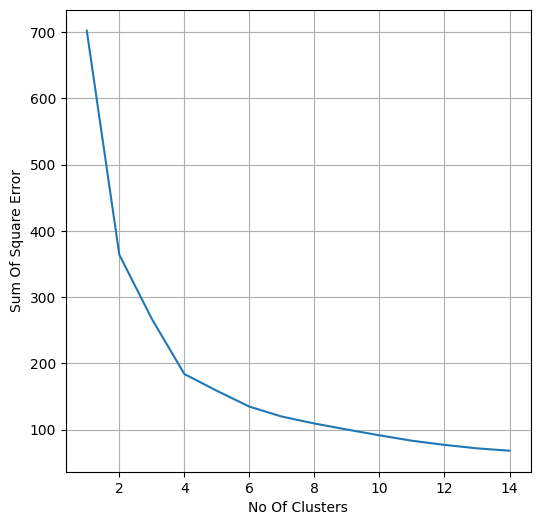

In [12]:
plt.figure(figsize=(6,6))
plt.plot(range(1,15),sse)
plt.xlabel("No Of Clusters")
plt.ylabel("Sum Of Square Error")
plt.grid()
plt.show()

In [13]:
km = KMeans(n_clusters=4,n_init=500)

In [14]:
km.fit(df)

KMeans(n_clusters=4, n_init=500)

In [15]:
Y_predict1 = km.fit_predict(df)

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_score(df,Y_predict1)

0.45722583958295593

In [18]:
from sklearn.decomposition import PCA

In [19]:
pc = PCA(n_components=2)

In [20]:
pc.fit(df)

PCA(n_components=2)

In [21]:
df_pc = pc.transform(df)

In [22]:
df.shape

(101, 16)

In [23]:
df_pc.shape

(101, 2)

In [24]:
km.fit(df_pc)

KMeans(n_clusters=4, n_init=500)

In [25]:
Y_predict2 = km.fit_predict(df_pc)

In [26]:
silhouette_score(df_pc,Y_predict2)

0.680455606564312